# PyTorch: Variable, Gradientes e Grafo Computacional

## Objetivos

Este notebook introduz
- o conceito de `Variables` do PyTorch,
- uma interpretação numérica intuitiva do gradiente, e o
- grafo computacional, utilizado para o cálculo automático do gradiente de uma função.

Um dos principais fundamentos para que o PyTorch seja adequado para deep learning é a sua habilidade de
calcular o gradiente automaticamente a partir da expressões definidas. Essa facilidade é implementada
pelo tipo Variable do PyTorch, que adiciona ao tensor a facilidade de cálculo automático do gradiente pela construção dinâmica do grafo computacional.

## Grafo computacional

```
    y_pred = x * w
    e = y_pred - y
    e2 = e**2
    J = e2.sum()
```

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/GrafoComputacional.png)

Variable possui 3 campos: o dado em si (data), o gradiente (grad) e um apontador (creator) para construir o grafo da backpropagation. Uma expressão utilizada para o cálculo do gradiente exige que todas suas expressões sejam calculadas com Variables, caso contrário não é possível construir o grafo computacional.

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/variables.png)

In [1]:
import torch
from torch.autograd import Variable

## Variable é criada a partir de um tensor e possui as mesmas funcionalidades

In [2]:
y_t = 2 * torch.arange(0.,4.)
y = Variable(y_t); y

tensor([0., 2., 4., 6.])

In [3]:
x = Variable(torch.arange(0.,4.)); x

tensor([0., 1., 2., 3.])

In [4]:
w = Variable(torch.ones(1),requires_grad=True); w

tensor([1.], requires_grad=True)

## Cálculo automático do gradiente da função perda J

Seja a expressão: $$ J = ((x  w) - y)^2 $$

Queremos calcular a derivada de $J$ em relação a $w$.

### Montagem do grafo computacional

In [5]:
# predict (forward)
y_pred = x * w

# cálculo da perda J: loss
e = y_pred - y
e2 = e.pow(2)
J = e2.sum()
J

tensor(14., grad_fn=<SumBackward0>)

## Auto grad - processa o grafo computacional backwards

O `backward()` varre o grafo computacional a partir da variável a ele associada e calcula o gradiente para todas as `Variables` que possuem o atributo `requires_grad` como verdadeiro.
O `backward()` destroi o grafo após sua execução. Isso é intrínsico ao PyTorch pelo fato dele ser uma rede dinâmica.

In [6]:
J.backward()
print(w.grad)

tensor([-28.])


In [7]:
w.grad.data.zero_();

## Interpretação do Gradiente

O gradiente de uma variável final (J) com respeito à outra variável de entrada (w) pode ser interpretado como o quanto a variável final J vai aumentar se houver um pequeno aumento na variável de entrada (w).
Por exemplo suponha que o gradiente seja 28. Isto significa se aumentarmos a variável w de 0.001, então J vai aumentar de 0.028.

In [8]:
eps = 0.001
y_pred = x * (w+eps)
J_new = (y_pred - y).pow(2).sum()
J_new

tensor(13.9720, grad_fn=<SumBackward0>)

In [9]:
print((J_new - J).data.numpy())

-0.027988434


## Back propagation

Uma forma equivalente explícita de calcular o gradiente é fazendo o processamento do backpropagation no grafo computacional, de forma explícita.
Apenas como ilustração.

In [10]:
import numpy as np

dJ = 1.
de2 = dJ * np.ones((4,))
de = de2 * 2 * e.data.numpy()
dy_pred = de
dw = (dy_pred * x.data.numpy()).sum()
print(dJ)
print(de2)
print(de)
print(dw)


1.0
[1. 1. 1. 1.]
[ 0. -2. -4. -6.]
-28.0


## Visualizando o grafo computacional

In [ ]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to /tmp/pip-req-build-v2yih32t
    100% |████████████████████████████████| 591.8MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x60cf4000 @  0x7f018bb872a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
  Running setup.py bdist_wheel for pytorchviz ... - done
  Stored in directory: /tmp/pip-ephem-wheel-cache-9i9czfo3/wheels/b9/b9/85/ef34936f58754cb23840fd869be1367b5d525e29915a2a4fe9
Successfully built pytorchviz


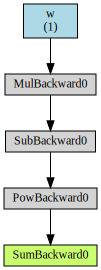

In [ ]:
from torchviz import make_dot, make_dot_from_trace
J = ((w * x) - y).pow(2).sum()
p = {'w':w} # dicionário de parâmetros
out = make_dot(J,params=p)
out


# Exercícios

## Questões

1. Por que numa expressão computacional não é possível misturar `Variable` com tensores?
2. O que acontece com o grafo computacional após execução do `backward()`?

## Atividades

1. Execute um passo de atualização do valor de w, pelo
gradiente descendente. Utilize um fator de aprendizado (*learning rate*) de 0.1
para atualizar o `w`. Após, recalcule a função de perda:

    - w = w - lr * w.grad.data
    - execute a célula 1.3.1 e verifique o quanto que a perda J diminuiu
    
2. No trecho abaixo, uma rede bastante conhecida, `resnet18` contendo 18 camadas
   é criada, tendo
   como entrada `xin` que é convertida para `Variable`, resultando na saída `y`.
   
   Descomente a linha que cria a vizualização do grafo computacional e execute a
   célula para visualizar o grafo computacional da rede `resnet18`:

In [ ]:
!pip install torchvision
from torchvision import models
xin = torch.randn(1,3,224,224)
resnet34 = models.resnet34()
y = resnet34(Variable(xin))

    100% |████████████████████████████████| 61kB 4.0MB/s 
    100% |████████████████████████████████| 2.0MB 11.1MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  [PIL]
You must restart the runtime in order to use newly installed versions.


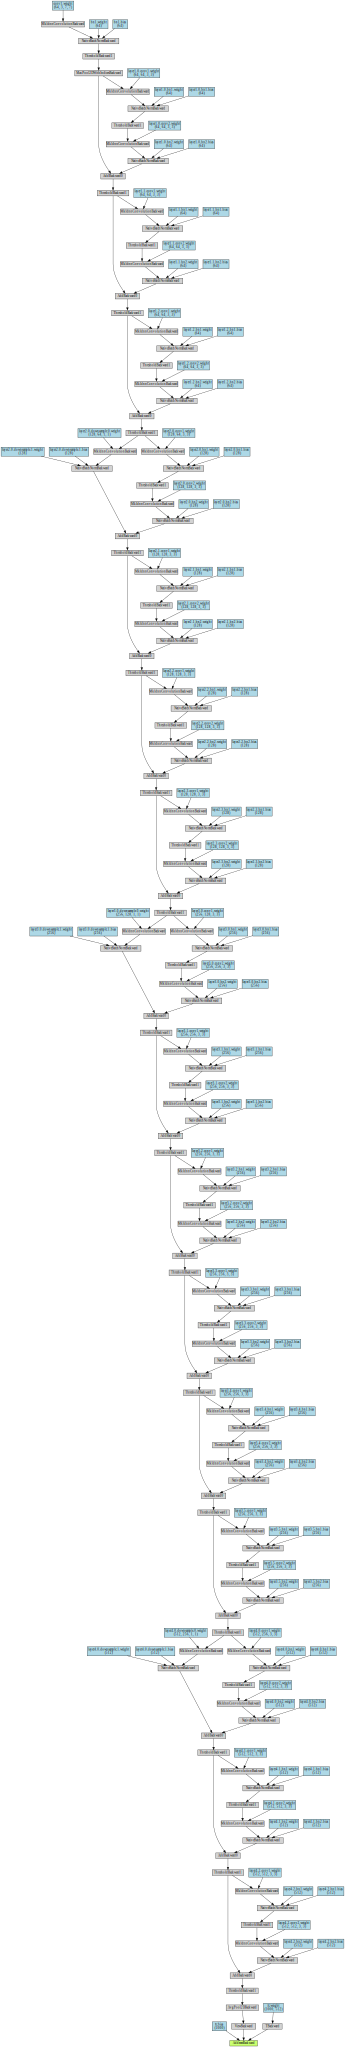

In [ ]:
g = make_dot(y, dict(resnet34.named_parameters()))
g

# Aprendizados com este notebook